# Coursework 1 - Mathematics for Machine Learning

## Due: 25/03/2025

## CID: 02021144

***
***

## Exercise 1: Quick questions [2 points]

#### Question 1:

Enter your answer here

#### Question 2:

Enter your answer here

#### Question 3:

Enter your answer here

#### Question 4:

Enter your answer here

*** 
***

## Exercise 2: [6 points]


### Question 1 [2 points]


***

### Question 2 [2 points]

***

### Question 3 [2 points]

***
***

## Exercise 3: Implementation [13 points]

In [4]:
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchsummary

## Part 1: Image classification [4 points]

***
### Question 1 [0.5 point]


Download the dataset from
https://chaladze.com/l5/img/Linnaeus%205%2032X32.rar
and uncompress the .rar dataset to a folder named "Linnaeus_5_32X32" in the current directory.
This folder contains a subfolder "Linnaeus 5 32X32", which contains a test and a train folder with the images of the dataset in 5 different classes: berry, bird, dog, flower, other.

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

# trainset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32\\Linnaeus 5 32X32\\train", transform=transform)
trainset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32/Linnaeus 5 32X32/train", transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# testset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32\\Linnaeus 5 32X32\\test", transform=transform)
testset = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32/Linnaeus 5 32X32/test", transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False,)

classes = ('berry', 'bird', 'dog', 'flower', 'other')

In [6]:
trainset.classes

['berry', 'bird', 'dog', 'flower', 'other']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.827451..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.7647059].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.827451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.90588236..0.92156863].


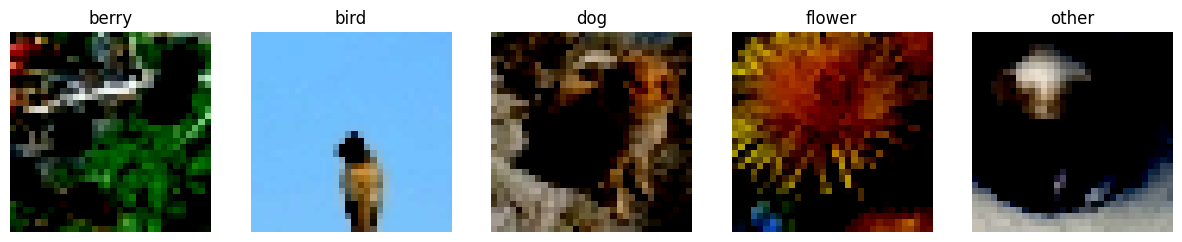

In [7]:
to_display = {cls: None for cls in trainset.classes}
idx_to_class = {i: c for c, i in trainset.class_to_idx.items()}
i = 0
j = 0
for img, label in trainset:
    if to_display[idx_to_class[label]] is None:
        to_display[idx_to_class[label]] = img
        i += 1
    if i >= len(trainset.classes):
        break

fig, axs = plt.subplots(1, len(trainset.classes), figsize=(15, 3))
for i in range(len(trainset.classes)):
    cls = trainset.classes[i]
    axs[i].imshow(to_display[cls].numpy().transpose(1, 2, 0))
    axs[i].axis('off')
    axs[i].set_title(cls)
plt.show()

### Question 2 [0.5 point]

```
transform = transforms.Compose([
    transforms.ToTensor (),W
    transforms . Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5)
)]
```
The above transform first takes an input image (either a PIL image or numpy array of shape (H, W, C)) and converts it into a torch tensor of shape (C, H, W) whilst scaling from [0, 255] to [0, 1]. Then the normalise transform applies channel-wise normalisation for each pixel. It computes $x_{norm} = \frac{x-0.5}{0.5}$. This transforms the pixel ranges from [0, 1] to [-1, 1].


***
### Question 3 [1 point]

In [8]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.mp1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.mp2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.mp3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=4096, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=5)

        self.relu = nn.ReLU()

    def forward(self, x, get_features=False):
        # cnn
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.mp1(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.mp2(x)
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.mp3(x)

        if get_features:
            return x

        # flatten
        x = x.view(-1, 4096)

        # fcn
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

***
### Question 4 [0.5 point]

In [9]:
torchsummary.summary(myCNN().cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          18,496
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

***
### Question 5 [0.5 point]

In [10]:
def train(myCNN, nr_epochs, optimizer ,criterion, trainloader):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion.to(device)


    for epoch in range(nr_epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = myCNN(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            nputs = inputs.cpu()
            labels = labels.cpu()

            optimizer.step()


        if epoch % 1 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, nr_epochs, loss.item()))

    model.cpu()
    criterion.cpu()

***
### Question 6 [0.5 point]

In [8]:
model = myCNN()

n_epochs = 30
optim = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model, n_epochs, optim, criterion, trainloader)

Epoch [0/30], Loss: 1.4070
Epoch [1/30], Loss: 1.2738
Epoch [2/30], Loss: 1.3283
Epoch [3/30], Loss: 1.2450
Epoch [4/30], Loss: 1.2149
Epoch [5/30], Loss: 1.2816
Epoch [6/30], Loss: 1.1733
Epoch [7/30], Loss: 1.1108
Epoch [8/30], Loss: 1.0217
Epoch [9/30], Loss: 0.7597
Epoch [10/30], Loss: 0.9319
Epoch [11/30], Loss: 0.6584
Epoch [12/30], Loss: 0.5902
Epoch [13/30], Loss: 0.6845
Epoch [14/30], Loss: 0.5496
Epoch [15/30], Loss: 0.6232
Epoch [16/30], Loss: 0.3814
Epoch [17/30], Loss: 0.3613
Epoch [18/30], Loss: 0.3442
Epoch [19/30], Loss: 0.1980
Epoch [20/30], Loss: 0.2919
Epoch [21/30], Loss: 0.2655
Epoch [22/30], Loss: 0.1310
Epoch [23/30], Loss: 0.1670
Epoch [24/30], Loss: 0.0793
Epoch [25/30], Loss: 0.0897
Epoch [26/30], Loss: 0.1540
Epoch [27/30], Loss: 0.0734
Epoch [28/30], Loss: 0.1289
Epoch [29/30], Loss: 0.0534


In [11]:
torch.save(model.state_dict(), 'mycnn.pth')

NameError: name 'model' is not defined

***
### Question 7 [0.5 point]

In [12]:
def accuracy(model, testloader):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    correct = {n: 0 for n in range(5)}
    total = {n: 0 for n in range(5)}
    model.to(device).eval()

    with torch.no_grad():
        for inputs, labels in testloader:
            output = model(inputs.to(device))
            output_argmax = torch.argmax(output, dim=-1).cpu()
    
            for u in torch.unique(labels):
                idxs = labels == output_argmax
                correct_for_class = torch.sum(labels[idxs] == output_argmax[idxs]).item()
                correct[u.item()] += correct_for_class
                total[u.item()] += labels.shape[0]

    c = testloader.dataset.class_to_idx
    for class_name in testloader.dataset.classes :
        print (f" Accuracy for class ’{class_name}’: {correct[c[class_name]] / total[c[class_name]] * 100:.2f}% ")

cnn = myCNN()
cnn.load_state_dict(torch.load('mycnn.pth', weights_only=True))
cnn.eval()

accuracy(cnn, testloader)

 Accuracy for class ’berry’: 73.44% 
 Accuracy for class ’bird’: 60.94% 
 Accuracy for class ’dog’: 77.73% 
 Accuracy for class ’flower’: 72.07% 
 Accuracy for class ’other’: 67.03% 


***
## Part 2: Fine-tuning a pretrained model [3.5 points]

### Question 1 [0.5 point]

In [14]:
transform_small = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size_small = 128

# trainset_small = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32_small\\train", transform=transform)
trainset_small = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32_small/train", transform=transform_small)

trainloader_small = torch.utils.data.DataLoader(trainset_small, batch_size=batch_size_small, shuffle=True)

# testset_small = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32_small\\test", transform=transform)
testset_small = torchvision.datasets.ImageFolder(root="Linnaeus_5_32X32_small/test", transform=transform_small)

testloader_small = torch.utils.data.DataLoader(testset_small, batch_size=batch_size_small, shuffle=False,)

***
### Question 2 [1 point]

LogSoftmax: Converts the raw logits (i.e. the unbounded output of the final linear layer) into log probabilities. This step is critical because:

It ensures numerical stability.
It provides inputs in the form that NLLLoss expects.

In [16]:
class myMLP(nn.Module):
    def __init__(self):
        super(myMLP, self).__init__()
        self.fc1 = nn.Linear(4096, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)
        
        self.relu = nn.ReLU()
        
        self.act = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        
        x = self.act(x)
        return x

In [15]:
torchsummary.summary(myMLP().cuda(), input_size=(4096,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         524,416
              ReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 128]          16,512
              ReLU-4                  [-1, 128]               0
            Linear-5                    [-1, 2]             258
        LogSoftmax-6                    [-1, 2]               0
Total params: 541,186
Trainable params: 541,186
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.00
Params size (MB): 2.06
Estimated Total Size (MB): 2.08
----------------------------------------------------------------


***
### Question 3 [0.5 point]

In [18]:
def fine_tune(myCNN, myMLP, nr_epochs, optimizer, criterion, trainloader):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    myMLP.to(device)
    myCNN.to(device)
    batch_size = trainloader.batch_size
    
    criterion.to(device)

    # freeze cnn
    for param in myCNN.parameters():
        param.requires_grad = False

    for epoch in range(nr_epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            features = myCNN.forward(inputs, get_features=True)
            features = features.view(features.shape[0], -1)
            outputs = myMLP(features)
            
            loss = criterion(outputs, labels)
            loss.backward()

            inputs = inputs.cpu()
            labels = labels.cpu()

            optimizer.step()


        if epoch % 1 == 0:
            print('Epoch [{}/{}], Loss: {:.8f}'.format(epoch, nr_epochs, loss.item()))

    myMLP.cpu()
    myCNN.cpu()
    criterion.cpu()

***
### Question 4 [0.5 point]

In [23]:
cnn = myCNN()
cnn.load_state_dict(torch.load('mycnn.pth', weights_only=True))
cnn.eval()

mlp = myMLP()

n_epochs = 30
optim = torch.optim.Adam(mlp.parameters(), lr=0.001)
criterion = nn.NLLLoss()

fine_tune(cnn, mlp, n_epochs, optim, criterion, trainloader_small)

Epoch [0/30], Loss: 0.03034190
Epoch [1/30], Loss: 0.02114680
Epoch [2/30], Loss: 0.00308281
Epoch [3/30], Loss: 0.00037422
Epoch [4/30], Loss: 0.00055709
Epoch [5/30], Loss: 0.00195786
Epoch [6/30], Loss: 0.00006142
Epoch [7/30], Loss: 0.00015321
Epoch [8/30], Loss: 0.00008415
Epoch [9/30], Loss: 0.00004754
Epoch [10/30], Loss: 0.00004157
Epoch [11/30], Loss: 0.00002248
Epoch [12/30], Loss: 0.00000315
Epoch [13/30], Loss: 0.00056532
Epoch [14/30], Loss: 0.00004048
Epoch [15/30], Loss: 0.00006879
Epoch [16/30], Loss: 0.00001287
Epoch [17/30], Loss: 0.00016789
Epoch [18/30], Loss: 0.00000719
Epoch [19/30], Loss: 0.00000754
Epoch [20/30], Loss: 0.00000537
Epoch [21/30], Loss: 0.00000111
Epoch [22/30], Loss: 0.00002647
Epoch [23/30], Loss: 0.00000132
Epoch [24/30], Loss: 0.00000468
Epoch [25/30], Loss: 0.00001248
Epoch [26/30], Loss: 0.00006904
Epoch [27/30], Loss: 0.00001489
Epoch [28/30], Loss: 0.00000493
Epoch [29/30], Loss: 0.00003881


In [24]:
torch.save(mlp.state_dict(), 'mymlp.pth')

***
### Question 5 [1 point]

In [20]:
def accuracy_fine_tune(myCNN, myMLP, testloader_small):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    myMLP.to(device).eval()
    myCNN.to(device).eval()
    batch_size = trainloader_small.batch_size
    
    correct = {n: 0 for n in range(5)}
    total = {n: 0 for n in range(5)}

    with torch.no_grad():
        for inputs, labels in testloader_small:
            features = myCNN.forward(inputs.to(device), get_features=True)
            features = features.view(features.shape[0], -1)
            outputs = torch.exp(myMLP(features))
            output_argmax = torch.argmax(outputs, dim=-1).cpu()
    
            for u in torch.unique(labels):
                idxs = labels == output_argmax
                correct_for_class = torch.sum(labels[idxs] == output_argmax[idxs]).item()
                correct[u.item()] += correct_for_class
                total[u.item()] += labels.shape[0]

    c = testloader_small.dataset.class_to_idx
    # Print the accuracy for each class
    for class_name in testloader_small.dataset.classes :
        print (f" Accuracy for class ’{class_name}’: {correct[c[class_name]] / total[c[class_name]] * 100:.2f}%")

mlp = myMLP()
mlp.load_state_dict(torch.load('mymlp.pth', weights_only=True))
mlp.eval()

accuracy_fine_tune(cnn, mlp, testloader_small)

 Accuracy for class ’dog’: 95.51%
 Accuracy for class ’flower’: 96.88%


# Comments on results

***
## Part 3: Adversarial attacks [4.5 points]

***
### Question 1 [1 point]

In [30]:
def adversarial(myCNN, myMLP, image, label, epsilon=0.01):
    # Select device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Move models to device
    myCNN.to(device)
    myMLP.to(device)

    # Make a clone of the image and move it to device
    image = image.clone().to(device)

    # Set models to evaluation mode
    myCNN.eval()
    myMLP.eval()

    # NLLLoss matches your MLP's LogSoftmax output
    criterion = nn.NLLLoss()

    nr_steps = 10
    mu = 1.0
    alpha = epsilon / nr_steps

    # Momentum term (same shape as image, on device)
    g = torch.zeros_like(image, device=device)

    # The input that will be perturbed (enable gradient tracking)
    x = image.detach().requires_grad_()
    x.to(device)

    # Label tensor on the device
    # lbl = torch.tensor(label, device=device).unsqueeze(0).long()
    lbl = torch.tensor(label).clone().detach().unsqueeze(0).long().to(device)

    for i in range(nr_steps):
        # Zero the model gradients
        myCNN.zero_grad()
        myMLP.zero_grad()

        # Forward pass
        output = myCNN(x.unsqueeze(0), get_features=True)
        output = output.view(output.size(0), -1)
        output = myMLP(output)  # Already log probabilities

        # Compute loss
        loss = criterion(output, lbl)

        # Backprop to get gradient w.r.t. x
        loss.backward()
        grad = x.grad

        # Update momentum term (with L1-norm normalization)
        grad_norm = torch.norm(grad, p=1) + 1e-8  # small eps to avoid div-by-zero
        g = mu * g + grad / grad_norm

        # FGSM-like step with sign of momentum
        x = x + alpha * torch.sign(g)

        # Detach and require grad for next iteration
        x = x.detach().requires_grad_()

    # Final adversarial image
    adv_image = x.detach()

    # Optionally move back to CPU for further processing
    adv_image_cpu = adv_image.cpu()

    # Evaluate the final probability for the true label
    output = myCNN(adv_image.unsqueeze(0), get_features=True)
    output = output.view(output.size(0), -1)
    output = myMLP(output)  # log probabilities
    p = torch.exp(output)[0, label].item()

    return adv_image_cpu, p


### Question 2 [1 point]

***
### Question 3 [0.5 point]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.9372549].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9943136..0.93525493].


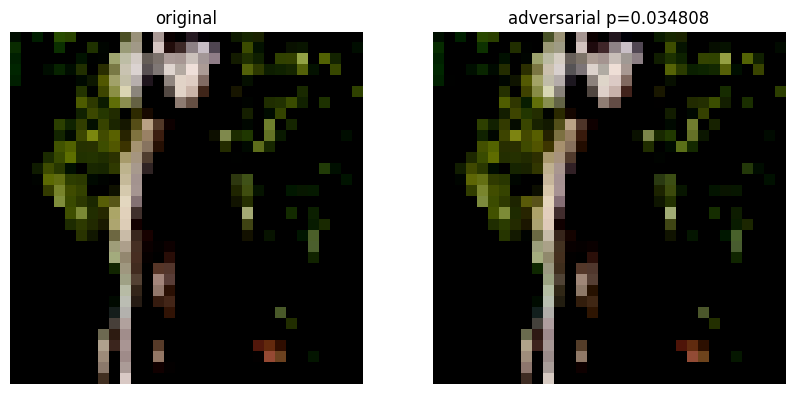

In [35]:
im, l = testset_small[5]
adv, p = adversarial(cnn, mlp, im, l)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im.detach().numpy().transpose(1, 2, 0))
ax[1].imshow(adv.detach().numpy().transpose(1, 2, 0))
ax[0].set_title("original")
ax[1].set_title(f"adversarial p={p:.6f}")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

***
### Question 4 [0.5 point]

In [39]:
def accuracy_adversarial(myCNN, myMLP, testloader_small, epsilon):
    total_correct = 0
    total_attacked = 0

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    myCNN = myCNN.to(device)
    myMLP = myMLP.to(device)

    # iterate over all batches of the test images
    for data in testloader_small:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        # Evaluate the fine-tuned model
        outputs = myCNN.forward(images, get_features=True)
        outputs = outputs.view(outputs.shape[0], -1)
        outputs = torch.exp(myMLP(outputs))
        output_argmax = torch.argmax(outputs, dim=-1)
        correct = (output_argmax == labels)

        # Loop over the images classified correctly in the current batch
        for im, lbl in zip(images[correct], labels[correct]):

            total_correct += 1
            # Generate an adversarial example
            adv, p = adversarial(myCNN, myMLP, im, lbl, epsilon)
            # Check if the attack was successful
            if p < 0.5:
                total_attacked += 1

    return total_attacked / total_correct
accuracy_adversarial(cnn, mlp, testloader_small, 0.05)

C:\Users\sumit\AppData\Local\Temp\ipykernel_14788\605925337.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbl = torch.tensor(label).clone().detach().unsqueeze(0).long().to(device)


0.6532467532467533

***
### Question 5 [1 point]

In [41]:
es = [0.02, 0.04, 0.06, 0.08, 0.1]
adv_success_rates = [accuracy_adversarial(cnn, mlp, testloader_small, e) for e in es]

C:\Users\sumit\AppData\Local\Temp\ipykernel_14788\605925337.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lbl = torch.tensor(label).clone().detach().unsqueeze(0).long().to(device)


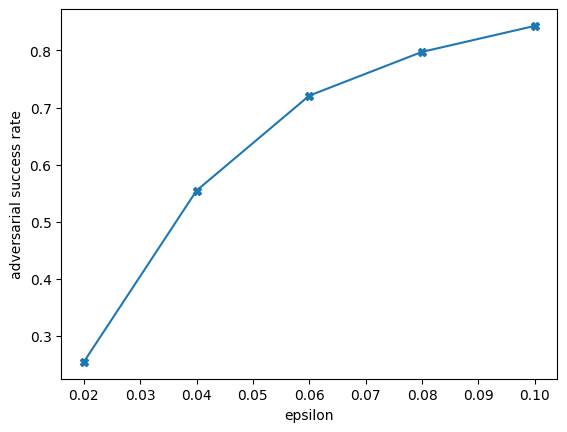

[(0.02, 0.2545454545454545),
 (0.04, 0.5545454545454546),
 (0.06, 0.7207792207792207),
 (0.08, 0.7974025974025974),
 (0.1, 0.8428571428571429)]

In [61]:
plt.plot(es, adv_success_rates, marker='X')

plt.xlabel('epsilon')
plt.ylabel('adversarial success rate')

plt.show()
list(zip(es, adv_success_rates))

# comment on results

***
### Question 6 [0.5 point]